In [23]:
from particles_mod.PlainMembrane import *
import hydrodynamic_int.hessian as hess
import numpy as np
import matplotlib.pyplot as plt
import pyvista as pv
np.set_printoptions(precision=3)
pv.set_jupyter_backend('html')


In [24]:
def graph_positions(positions : list, title : str =None):
    """
    Graph the positions of particles in a 3D space.
    :param positions: A list of tuples containing the x, y and z coordinates of each particle.
    :param title: The title of the graph.
    """
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x = [pos[0] for pos in positions]
    y = [pos[1] for pos in positions]
    z = [pos[2] for pos in positions]
    ax.scatter(x, y, z)
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    if title:
        plt.title(title)
    plt.show()

def plot_eigenvalues(eigenvalues: np.ndarray, title : str =None):
    """
    Plot the eigenvalues of the Hessian matrix.
    :param eigenvalues: A numpy array containing the eigenvalues of the Hessian matrix.
    :param title: The title of the graph.
    """
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(range(len(eigenvalues)), eigenvalues, c='b', marker='o', alpha=0.5)
    ax.set_xlabel('Eigenvalue Index')
    ax.set_ylabel('Eigenvalue')
    if title:
        plt.title(title)
    plt.show()

def createfrontviewsp(ax, positions : list, eigenmode: np.ndarray):
    """
    Create a front view of the eigenmode positions of particles in a 3D space. Thus imply to grpah only the x and z coordinates.
    :param ax: The axis to plot on.
    :param positions: A list of tuples containing the x, y and z coordinates of each particle.
    :param eigenmode: A numpy array containing the eigenmode data in (nparticles, 3) format.
    """
    x = [pos[0] for pos in positions]
    z = [pos[2] for pos in positions]
    x_eigen = [pos[0] + eigenmode[i][0] for i, pos in enumerate(positions)]
    z_eigen = [pos[2] + eigenmode[i][2] for i, pos in enumerate(positions)]
    ax.scatter(x, z, c='b', marker='o', alpha=0.25, label='Original')
    ax.scatter(x_eigen, z_eigen, c='m', marker='o', alpha=0.75, label='Eigenmode')
    ax.set_xlabel('X Label')
    ax.set_ylabel('Z Label')
    ax.set_title('Front View')
    ax.legend()

def createsideviewsp(ax, positions : list, eigenmode: np.ndarray):
    """
    Create a side view of the eigenmode positions of particles in a 3D space. Thus imply to grpah only the y and z coordinates.
    :param ax: The axis to plot on.
    :param positions: A list of tuples containing the x, y and z coordinates of each particle.
    :param eigenmode: A numpy array containing the eigenmode data in (nparticles, 3) format.
    """
    y = [pos[1] for pos in positions]
    z = [pos[2] for pos in positions]
    y_eigen = [pos[1] + eigenmode[i][1] for i, pos in enumerate(positions)]
    z_eigen = [pos[2] + eigenmode[i][2] for i, pos in enumerate(positions)]
    ax.scatter(y, z, c='b', marker='o', alpha=0.25, label='Original')
    ax.scatter(y_eigen, z_eigen, c='m', marker='o', alpha=0.75, label='Eigenmode')
    ax.set_xlabel('Y Label')
    ax.set_ylabel('Z Label')
    ax.set_title('Side View')

def createtopviewsp(ax, positions : list, eigenmode: np.ndarray):
    """
    Create a top view of the eigenmode positions of particles in a 3D space. Thus imply to grpah only the x and y coordinates.
    :param ax: The axis to plot on.
    :param positions: A list of tuples containing the x, y and z coordinates of each particle.
    :param eigenmode: A numpy array containing the eigenmode data in (nparticles, 3) format.
    """
    x = [pos[0] for pos in positions]
    y = [pos[1] for pos in positions]
    x_eigen = [pos[0] + eigenmode[i][0] for i, pos in enumerate(positions)]
    y_eigen = [pos[1] + eigenmode[i][1] for i, pos in enumerate(positions)]
    ax.scatter(x, y, c='b', marker='o', alpha=0.25, label='Original')
    ax.scatter(x_eigen, y_eigen, c='m', marker='o', alpha=0.75, label='Eigenmode')
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_title('Top View')

def create3dviewsp(ax, positions : list, eigenmode: np.ndarray):
    """
    Create a 3D view of the eigenmode positions of particles in a 3D space.
    :param ax: The axis to plot on.
    :param positions: A list of tuples containing the x, y and z coordinates of each particle.
    :param eigenmode: A numpy array containing the eigenmode data in (nparticles, 3) format.
    """
    x = [pos[0] for pos in positions]
    y = [pos[1] for pos in positions]
    z = [pos[2] for pos in positions]
    x_eigen = [pos[0] + eigenmode[i][0] for i, pos in enumerate(positions)]
    y_eigen = [pos[1] + eigenmode[i][1] for i, pos in enumerate(positions)]
    z_eigen = [pos[2] + eigenmode[i][2] for i, pos in enumerate(positions)]
    ax.scatter(x_eigen, y_eigen, z_eigen, c='m', marker='o', alpha=0.5)
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.set_title('3D View')



def graph_mode (positions : list, eigenmode: np.ndarray, title : str =None):
    """
    Graph the eigenmode positions of particles in a 3D space.
    :param positions: A list of tuples containing the x, y and z coordinates of each particle.
    :param eigenmode: A numpy array containing the eigenmode data in (nparticles, 3) format.
    :param title: The title of the graph.
    """
    fig = plt.figure()
    ax = fig.add_subplot(2, 2, 1)
    createfrontviewsp(ax, positions, eigenmode)
    ax = fig.add_subplot(2, 2, 2)
    createsideviewsp(ax, positions, eigenmode)
    ax = fig.add_subplot(2, 2, 3)
    createtopviewsp(ax, positions, eigenmode)
    ax = fig.add_subplot(2, 2, 4, projection='3d')
    create3dviewsp(ax, positions, eigenmode)
    if title:
        plt.title(title)
    plt.tight_layout()
    plt.show()

def graph_mode_surface (positions : list, eigenmode: np.ndarray, title : str =None):
    """
    Graph a 3D surface that fits the eigenmode positions of particles in a 3D space.
    :param positions: A list of tuples containing the x, y and z coordinates of each particle.
    :param eigenmode: A numpy array containing the eigenmode displacements data in (nparticles, 3) format.
    :param title: The title of the graph.
    """
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x = [pos[0] for pos in positions]
    y = [pos[1] for pos in positions]
    z = [pos[2] for pos in positions]
    x_eigen = [pos[0] + eigenmode[i][0] for i, pos in enumerate(positions)]
    y_eigen = [pos[1] + eigenmode[i][1] for i, pos in enumerate(positions)]
    z_eigen = [pos[2] + eigenmode[i][2] for i, pos in enumerate(positions)]
    ax.plot_trisurf(x_eigen, y_eigen, z_eigen, color='m', alpha=0.5)
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    if title:
        plt.title(title)
    plt.show()


In [25]:

length = 10
Density = 1
Kp = 1/np.sqrt(Density)

positions, bonds = construct_structure(length, length, Density, Ka=1, Kp=1)




In [26]:

hessian = hess.obtainHessian(positions, bonds, create_sp=True, method='Numerical')
hessian_analytical = hess.obtainHessian(positions, bonds, create_sp=True, method='Analytical')




[WARNING] UAMMD-structured Python wrapper is not compatible with UAMMD-structured self restarting mechanism
[MESSAGE] ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
[MESSAGE] ╻ ╻┏━┓┏┳┓┏┳┓╺┳┓
[MESSAGE] ┃ ┃┣━┫┃┃┃┃┃┃ ┃┃ Version: 2.5
[MESSAGE] ┗━┛╹ ╹╹ ╹╹ ╹╺┻┛
[MESSAGE] Compiled at: May 16 2025 14:06:38
[MESSAGE] Compiled in double precision mode
[MESSAGE] Computation started at Thu May 22 16:25:51 2025

[MESSAGE] [System] CUDA initialized
[MESSAGE] [System] Using device: NVIDIA GeForce RTX 3080 with id: 0
[MESSAGE] [System] Compute capability of the device: 8.6
[MESSAGE] ━ ━ ━ ━ ━ ━ ━ ━ ━ ━ ━ ━ ━ ━ ━ ━ ━ ━ ━ ━ ━ ━ ━ ━ ━ ━ ━ ━ ━ 
[MESSAGE] [ExtendedSystem] (system) Name: Hessian_Calculation
[MESSAGE] [ExtendedSystem] (system) Seed: 1747923951499496107
[MESSAGE] [GlobalDataBase] Fundamental not specified, using default fundamental, "Time"
[WARNING] [Time] No timeStep specified, using 0.0 as default.
[MESSAGE] [Basic] Loaded type A, mass: 1.000000, radius: 0.500000, charge: 0.0

In [27]:
number_of_particles = len(positions)

# Create a file in results folder for storing the hessian reshaped to (nparticles * 3, nparticles * 3)
hessian_reshaped = hessian.transpose(0,2,1,3).reshape((number_of_particles * 3, number_of_particles * 3))
hessian_reshaped_analytical = hessian_analytical.transpose(0,2,1,3).reshape((number_of_particles * 3, number_of_particles * 3))
difference = np.abs(hessian_reshaped - hessian_reshaped_analytical)
np.savetxt('results/hessian_difference.txt', difference, delimiter=',', fmt='%.4e')
np.savetxt('results/hessian_numerical.txt', hessian_reshaped, delimiter=',', fmt='%.4e')
np.savetxt('results/hessian_analytical.txt', hessian_reshaped_analytical, delimiter=',', fmt='%.4e')

In [28]:
print("Hessian shape: ", hessian.shape)
print("Number of particles: ", len(positions))

Hessian shape:  (100, 100, 3, 3)
Number of particles:  100


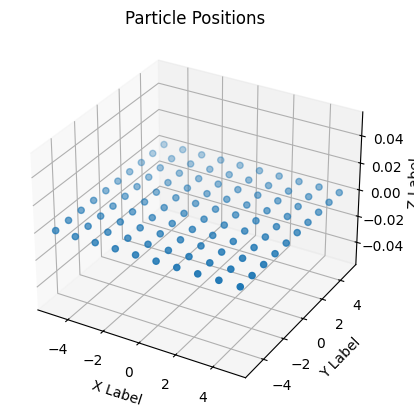

In [29]:
graph_positions(positions, title="Particle Positions")

In [30]:
eigenvalues, eigenvectors, hessian_reshaped, eigenvectors_reshaped = hess.diagonalize_hessian(hessian)
eigenvalues_analytical, eigenvectors_analytical, hessian_reshaped_analytical, eigenvectors_reshaped_analytical = hess.diagonalize_hessian(hessian_analytical)
print("Number of eigenvalues: ", len(eigenvalues))
print("Eigenvectors shape: ", eigenvectors.shape)

Number of eigenvalues:  300
Eigenvectors shape:  (300, 100, 3)


In [31]:
# Check if the eigenvectors are orthogonal
orthogonal = np.allclose(np.dot(eigenvectors_reshaped.T, eigenvectors_reshaped), np.eye(eigenvectors_reshaped.shape[1]))

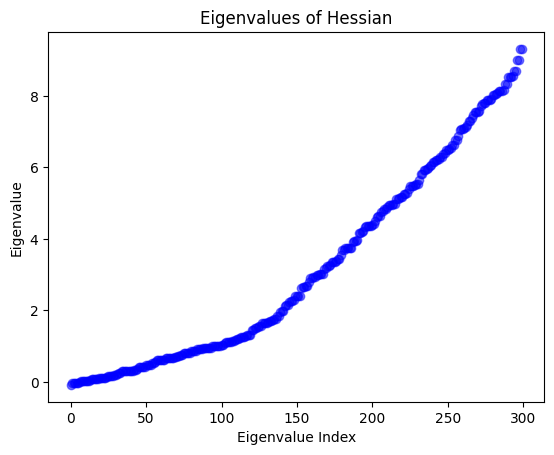

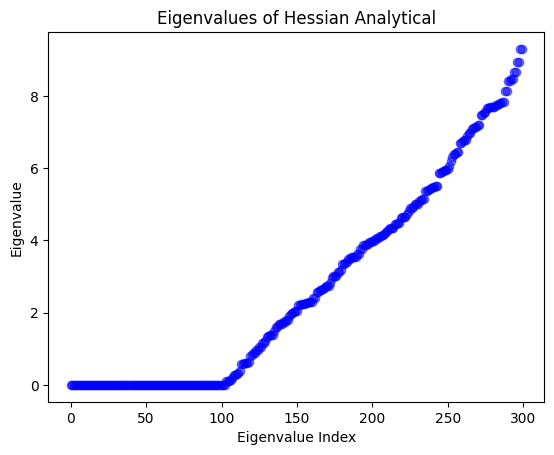

In [32]:
plot_eigenvalues(eigenvalues, title="Eigenvalues of Hessian")
plot_eigenvalues(eigenvalues_analytical, title="Eigenvalues of Hessian Analytical")

In [39]:
mode  = 10
positions_mesh = pv.PolyData(positions)
mesh = positions_mesh.delaunay_2d()
mesh['Eigenvector'] = eigenvectors[mode,:]
# plot with the eigenvectors as a vector field
p = pv.Plotter()
p.add_mesh(mesh, scalars='Eigenvector', show_scalar_bar=True, show_edges=True, cmap='coolwarm')
p.add_arrows(np.array(positions), eigenvectors[mode,:,:], color='red', mag=10)
p.show()


EmbeddableWidget(value='<iframe srcdoc="<!DOCTYPE html>\n<html>\n  <head>\n    <meta http-equiv=&quot;Content-…